## 복습
- 이전에 풀었던 코드를 기반으로 성능이나 가독성을 높이거나, 성능 등이 떨어지더라도 다른 방법으로 풀어보기

### [체육복](https://school.programmers.co.kr/learn/courses/30/lessons/42862)

- 기존 코드

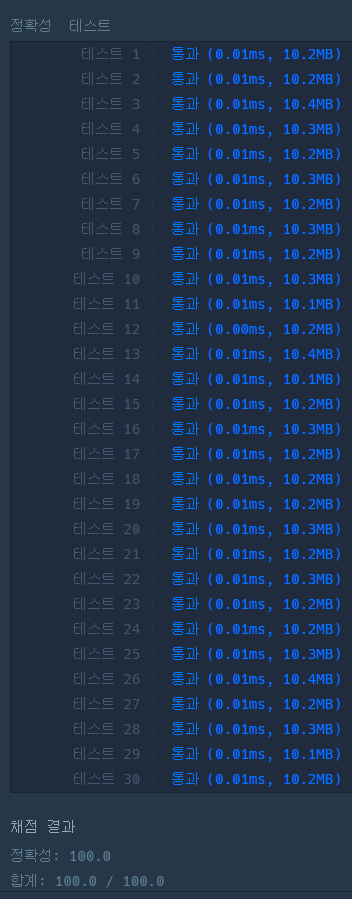

In [ ]:
def solution(n, lost, reserve):
    # 여벌 체육복을 가진 학생이 도난당한 경우를 제거
    reserve_set = set(reserve) - set(lost)
    lost_set = set(lost) - set(reserve)

    answer = n - len(lost_set)  # 처음에는 모든 학생이 수업을 들을 수 있다고 가정

    for student in sorted(lost_set):
        # 바로 앞 번호 학생에게 체육복을 빌릴 수 있는지 확인
        if student - 1 in reserve_set:
            reserve_set.remove(student - 1)
            answer += 1
        # 바로 뒷 번호 학생에게 체육복을 빌릴 수 있는지 확인
        elif student + 1 in reserve_set:
            reserve_set.remove(student + 1)
            answer += 1

    return answer


- 새로 작성한 코드  
: 속도는 비슷하거나 살짝 느리지만, 메모리 측면에서의 소소한 이점이 있음  
: 배열을 이용한 풀이 방식으로 조회수를 조금 줄일 수 있지 않을까해서 처리

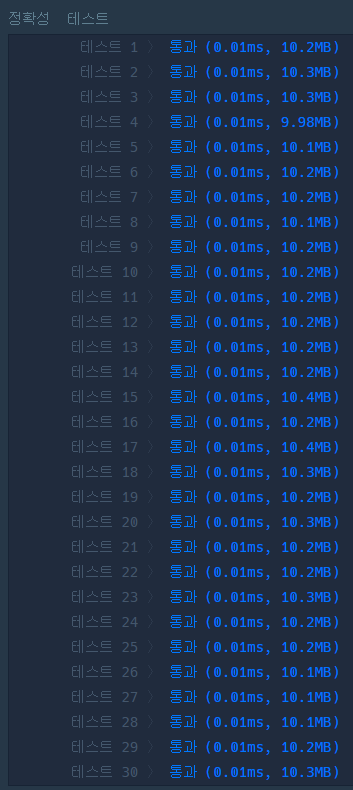

In [ ]:
def solution(n, lost, reserve):
    clothes = [1] * (n + 1)
    
    for l in lost:
        clothes[l] -= 1

    for r in reserve:
        clothes[r] += 1

    for i in range(1, n + 1):
        if clothes[i] == 0:
            if i > 1 and clothes[i - 1] == 2:
                clothes[i - 1] -= 1
                clothes[i] += 1
            elif i < n and clothes[i + 1] == 2:
                clothes[i + 1] -= 1
                clothes[i] += 1

    return sum(1 for c in clothes[1:] if c >= 1)

In [11]:
n, lost, reserve = 5, [2, 4], [1, 3, 5]
solution(n, lost, reserve)

5